# Dominant Color Extraction And Image Segmentation

--> Importing necessary libraries

In [15]:
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

--> Importing the image and plotting it

In [66]:
img = cv2.imread("flower.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
orshape=img.shape
print(img.shape)

(768, 1024, 3)


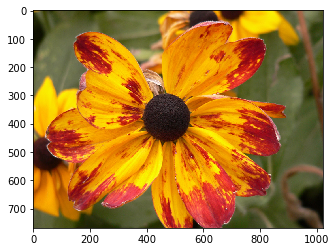

In [8]:
plt.imshow(img)
plt.show()

--> flattening the image

In [9]:
all_pixels = img.reshape((-1,3))
print(all_pixels.shape)

(786432, 3)


--> Choosing the number of clusters and applying the KMeans theorem



    (here we are choosing number of clusters to be 4)

In [35]:
dom_col = 4

km = KMeans(n_clusters=dom_col)
km.fit(all_pixels)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

-->  Resultant dominant coors

In [36]:
centers = np.array(km.cluster_centers_,dtype='uint8')
print(centers)

[[240 166  11]
 [ 57  46  20]
 [100  99  59]
 [191  66  24]]


--> Displaying the dominant colors

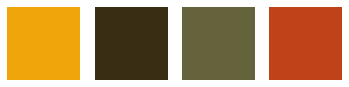

In [71]:
i=1
plt.figure(0)

colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()    

# Segmentation

-->Taking a new array object

In [73]:
new_img = np.zeros((768*1024,3),dtype='uint8')
print(new_img.shape)

(786432, 3)


In [74]:
colors

[array([240, 166,  11], dtype=uint8),
 array([57, 46, 20], dtype=uint8),
 array([100,  99,  59], dtype=uint8),
 array([191,  66,  24], dtype=uint8)]

--> Assigning the nearest color to every pixel of the image

In [82]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]    

--> Displaying the resultant image

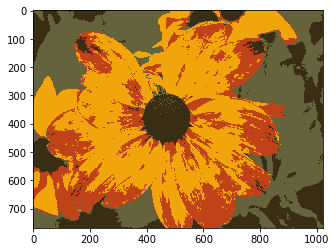

In [77]:
new_img = new_img.reshape((orshape))
plt.imshow(new_img)
plt.show()